In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_excel(r'..\..\Data\相关性最新.xlsx')
df

,RMR,WLC,WLA,WIA,TD,TI,UCS,WD,MTL,TN,ATI,TBD
0,1,1,0.000,0.000,1.360,1.290,52.64,1.0,0.2,2.0,0.68,11.0
1,2,1,10.100,12.350,99.120,26.890,10.20,4.0,0.5,7.0,0.55,20.0
2,3,3,8.900,10.230,63.440,18.640,32.00,3.0,1.2,15.0,0.32,40.0
3,4,2,4.300,6.010,35.660,11.560,50.56,2.0,1.7,18.0,0.10,350.0
4,3,1,0.000,0.000,2.360,3.570,60.25,2.0,1.4,14.0,0.18,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,2,2,16.858,8.028,56.476,10.459,11.94,2.0,NaN,NaN,NaN,NaN
156,4,3,7.214,3.461,65.889,25.101,21.86,4.0,NaN,NaN,NaN,NaN
157,3,3,22.491,2.869,30.330,11.504,16.99,3.0,NaN,NaN,NaN,NaN
158,5,4,24.662,6.223,89.944,21.963,7.29,2.0,NaN,NaN,NaN,NaN


In [31]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [32]:
aver = X.mean(axis=0)
X = X.fillna(aver)

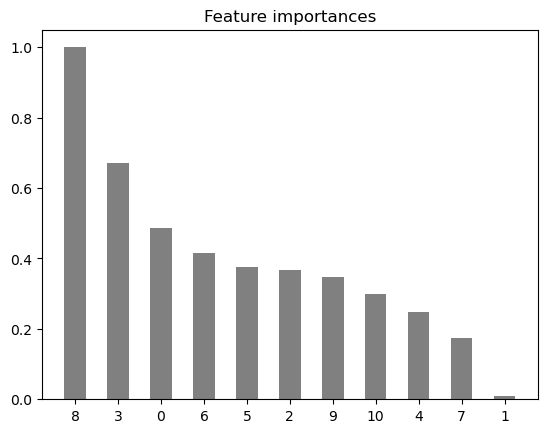

In [33]:
from model.UniVarSelector import UniVarSelector
%matplotlib inline
uni = UniVarSelector(X, y)
uni.fit()
uni.plot()

In [10]:
uni.indx
X = X.iloc[:, :-1]
X

,WLC,WLA,WIA,TD,TI,UCS,WD,MTL,TN,ATI
0,1,0.000,0.000,1.360,1.290,52.64,1.0,0.200000,2.000000,0.680000
1,1,10.100,12.350,99.120,26.890,10.20,4.0,0.500000,7.000000,0.550000
2,3,8.900,10.230,63.440,18.640,32.00,3.0,1.200000,15.000000,0.320000
3,2,4.300,6.010,35.660,11.560,50.56,2.0,1.700000,18.000000,0.100000
4,1,0.000,0.000,2.360,3.570,60.25,2.0,1.400000,14.000000,0.180000
...,...,...,...,...,...,...,...,...,...,...
155,2,16.858,8.028,56.476,10.459,11.94,2.0,1.258215,14.644068,0.278763
156,3,7.214,3.461,65.889,25.101,21.86,4.0,1.258215,14.644068,0.278763
157,3,22.491,2.869,30.330,11.504,16.99,3.0,1.258215,14.644068,0.278763
158,4,24.662,6.223,89.944,21.963,7.29,2.0,1.258215,14.644068,0.278763


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:
X_train

,WLC,WLA,WIA,TD,TI,UCS,WD,MTL,TN,ATI,TBD
158,4,24.662,6.223,89.944,21.963,7.29,2.0,1.258215,14.644068,0.278763,202.336842
49,2,4.300,6.010,35.660,11.560,50.56,2.0,1.258215,14.644068,0.278763,202.336842
68,2,6.040,8.320,67.280,17.650,26.54,2.0,1.258215,14.644068,0.278763,202.336842
2,3,8.900,10.230,63.440,18.640,32.00,3.0,1.200000,15.000000,0.320000,40.000000
59,1,2.560,1.030,18.230,6.270,45.66,2.0,1.258215,14.644068,0.278763,202.336842
...,...,...,...,...,...,...,...,...,...,...,...
113,1,0.000,1.775,28.238,0.000,9.90,4.0,0.582000,14.644068,0.278763,217.000000
64,3,2.570,2.250,6.870,6.270,44.87,2.0,1.258215,14.644068,0.278763,202.336842
15,5,13.670,12.340,99.370,19.850,3.24,4.0,1.870000,16.000000,0.150000,246.000000
125,1,0.000,2.127,40.789,10.459,4.75,3.0,1.007000,14.644068,0.278763,83.000000


In [37]:
aver = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-aver)/std
X_test = (X_test-aver)/std
X_train

,WLC,WLA,WIA,TD,TI,UCS,WD,MTL,TN,ATI,TBD
158,1.540212,-0.050309,0.565025,1.817375,1.925099,-1.508329,-1.038660,-0.041149,-0.053053,-0.008044,-0.047794
49,-0.227924,-0.093169,0.497461,-0.238167,0.290598,1.173956,-1.038660,-0.041149,-0.053053,-0.008044,-0.047794
68,-0.227924,-0.089506,1.230195,0.959170,1.247448,-0.315031,-1.038660,-0.041149,-0.053053,-0.008044,-0.047794
2,0.656144,-0.083486,1.836050,0.813763,1.402995,0.023431,0.041698,-0.222851,0.093965,0.298254,-2.483476
59,-1.111992,-0.096832,-1.082201,-0.898180,-0.540558,0.870207,-1.038660,-0.041149,-0.053053,-0.008044,-0.047794
...,...,...,...,...,...,...,...,...,...,...,...
113,-1.111992,-0.102220,-0.845886,-0.519212,-1.525690,-1.346536,1.122057,-2.151766,-0.053053,-0.008044,0.172210
64,0.656144,-0.096810,-0.695216,-1.328343,-0.540558,0.821236,-1.038660,-0.041149,-0.053053,-0.008044,-0.047794
15,2.424280,-0.073446,2.505344,2.174305,1.593108,-1.759386,1.122057,1.868367,0.507015,-0.964456,0.607323
125,-1.111992,-0.102220,-0.734232,-0.043950,0.117610,-1.665782,0.041698,-0.825247,-0.053053,-0.008044,-1.838309


In [41]:
clf = MLPClassifier(hidden_layer_sizes=(10, 15, 10), alpha=1e-5, random_state=2, max_iter=1000, learning_rate='adaptive', solver='lbfgs', verbose=True)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
ypred = clf.predict(X_train)
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)             # 训练

    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))

    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))

    # print ("\n混淆矩阵:")
    # print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(clf, X_train, X_test, y_train, y_test)

训练集精度:
1.0

测试集精度:
0.53125

分类识别报告:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.38      0.75      0.50         4
           3       0.67      0.46      0.55        13
           4       0.60      0.55      0.57        11
           5       0.33      0.33      0.33         3

    accuracy                           0.53        32
   macro avg       0.49      0.62      0.52        32
weighted avg       0.57      0.53      0.53        32


In [12]:
y_train_, y_test_ = y_train - 1, y_test - 1

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
# from keras.optimizers import lbfgs

tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(units=20, activation="relu", name="layer1", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=15, activation="relu", name="layer2", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=10, activation="relu", name="layer3", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=5, activation="linear", name="layer4", kernel_regularizer=tf.keras.regularizers.l2(0.001))
    ], name="model"
)

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits = True),
    # optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer=SGD(momentum=0.5, decay=0.005),
    metrics=['Accuracy']
)

history = model.fit(
    X_train, y_train_,
    epochs = 1000,
    validation_data=(X_test, y_test_)
)

Epoch 1/1000
6/6 [==============================] - 1s 52ms/step - loss: 1.7273 - Accuracy: 0.2262 - val_loss: 1.6566 - val_Accuracy: 0.3333
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.6856 - Accuracy: 0.2024 - val_loss: 1.6344 - val_Accuracy: 0.3810
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.6556 - Accuracy: 0.2262 - val_loss: 1.6201 - val_Accuracy: 0.3095
Epoch 4/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.6331 - Accuracy: 0.2560 - val_loss: 1.6078 - val_Accuracy: 0.3571
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.6153 - Accuracy: 0.2679 - val_loss: 1.5998 - val_Accuracy: 0.3571
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.6010 - Accuracy: 0.3095 - val_loss: 1.5929 - val_Accuracy: 0.3333
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.5884 - Accuracy: 0.3333 - val_loss: 1.5878 - val_Accuracy: 0.3571
Epoch 8/1000
6/6 [=

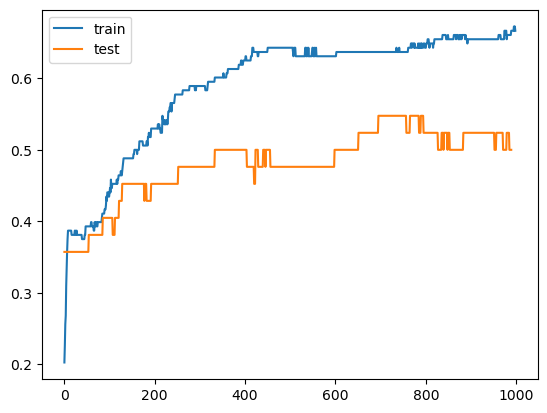

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['Accuracy'][1:], label='train')           #制作训练集准确率图
plt.plot(history.history['val_Accuracy'][10:], label='test')     #制作测试集准确率图
plt.legend()
plt.show()